In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

In [2]:
# Import Data

df = pd.read_csv("master.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
df.rename(columns={" gdp_for_year ($) ": "gdp_for_year ($)"}, inplace=True)

In [6]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
# Remove commas

df["gdp_for_year ($)"] = df["gdp_for_year ($)"].apply(lambda x: x.replace(",", ""))


# Convert to numeric data type to aid future querying

df["gdp_for_year ($)"] = df["gdp_for_year ($)"].apply(pd.to_numeric)


In [8]:
# Remove unwanted column

df.drop(columns=["country-year"], inplace=True)

In [9]:
# Understanding the data

df["age"].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [10]:
df[(df["country"] == "Albania") & (df["year"] == 1987)].sort_values("sex")

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2156624900,796,Generation X
5,Albania,1987,female,75+ years,1,35600,2.81,NaN,2156624900,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,NaN,2156624900,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,NaN,2156624900,796,Boomers
9,Albania,1987,female,5-14 years,0,311000,0.00,NaN,2156624900,796,Generation X
10,Albania,1987,female,55-74 years,0,144600,0.00,NaN,2156624900,796,G.I. Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796,Silent
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2156624900,796,Boomers


For each gender we have the following age categories:
- 5-14
- 15-24
- 25-34
- 35-54
- 55-74
- 75+

## What insights might we want to obtain:

- Annual suicide count per country


- Do more males or females commit suicide?

- In which year did the most suicides occur?
    - How are international suicide rates changing over time? - Are they increasing or decreasing
    - Which countries have experience the greatest increase in suicide rates from 1987 - 2015? (top 5)
     
- Which age range features the greatest number of suicides?

- Can any correlation be found between gdp (whether year or per capita) and number of suicides?
    

### Annual suicide count per country

In [11]:
pd.set_option('display.max_rows', None)
df[["country", "suicides_no"]].groupby("country").sum("suicides_no").sort_values(by=["suicides_no"], ascending=False).head(10)

,suicides_no
country,
Russian Federation,1209742
United States,1034013
Japan,806902
France,329127
Ukraine,319950
Germany,291262
Republic of Korea,261730
Brazil,226613
Poland,139098


### Suicide count per year

In [12]:
pd.set_option('display.max_rows', 10)
annual_suicides = df[["year", "suicides_no"]].groupby("year").sum("suicides_no").rename(columns={"suicides_no": "annual_suicides"})

Text(0.5, 1.0, 'Annual Suicide Count Per Year')

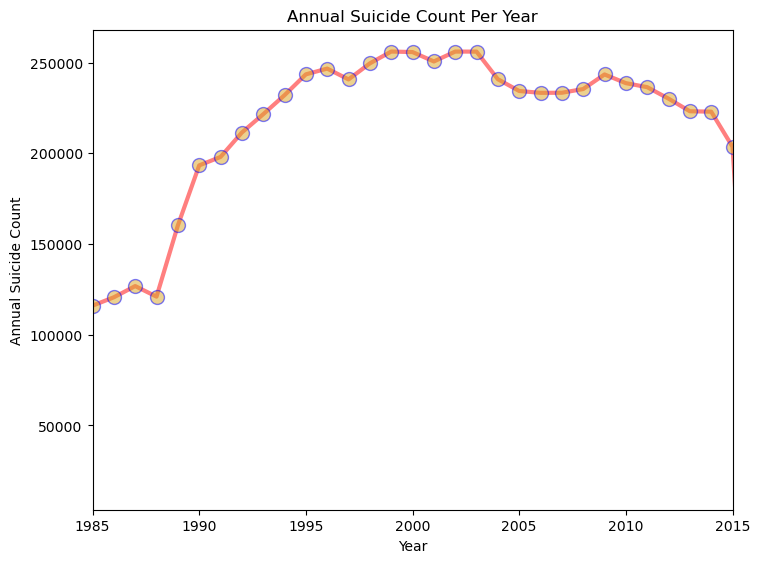

In [13]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(annual_suicides.index, annual_suicides["annual_suicides"], lw=3, marker="o", alpha=0.5, c="r",ms=10, mec="blue", mfc="GoldenRod")
axes.set_xlabel("Year")
axes.set_xlim(1985, 2015)
axes.set_ylabel("Annual Suicide Count")
axes.set_title("Annual Suicide Count Per Year")

### How suicide rates fluctuate with gender

In [14]:
male_v_female = df[["sex", "suicides_no"]].groupby("sex", as_index=False).sum("suicides_no")
male_v_female

# Difference between male and female suicides
male_v_female.iloc[-1].values[1]/male_v_female.iloc[0].values[1]

3.3272694628440984

Text(0.5, 1.0, 'Male and Female Suicide Count')

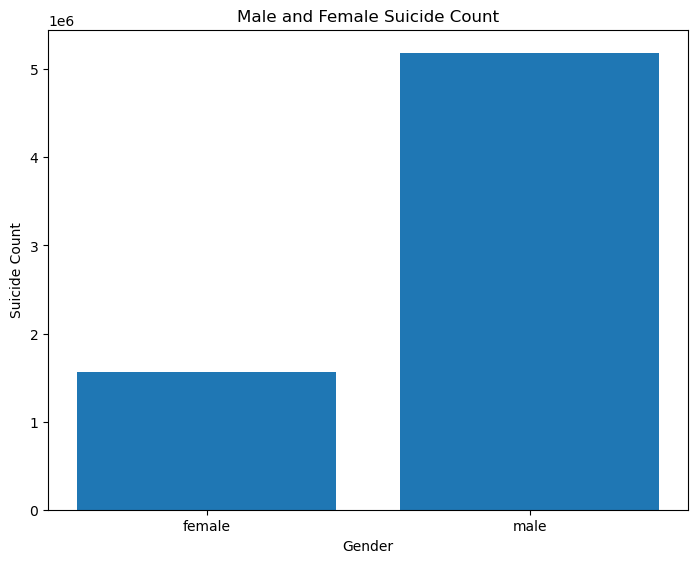

In [15]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.bar(male_v_female["sex"], male_v_female["suicides_no"])
axes.set_xlabel("Gender")
axes.set_ylabel("Suicide Count")
axes.set_title("Male and Female Suicide Count")

In [16]:
annual_rates_gender = df[["year", "sex", "suicides_no"]].groupby(by=["year", "sex"], as_index=False).sum("suicides_no")

### In which age ranges do the greatest number of suicides occur

In [17]:
age_range = df[["age", "suicides_no"]].groupby("age").sum("suicides_no").sort_values("suicides_no")

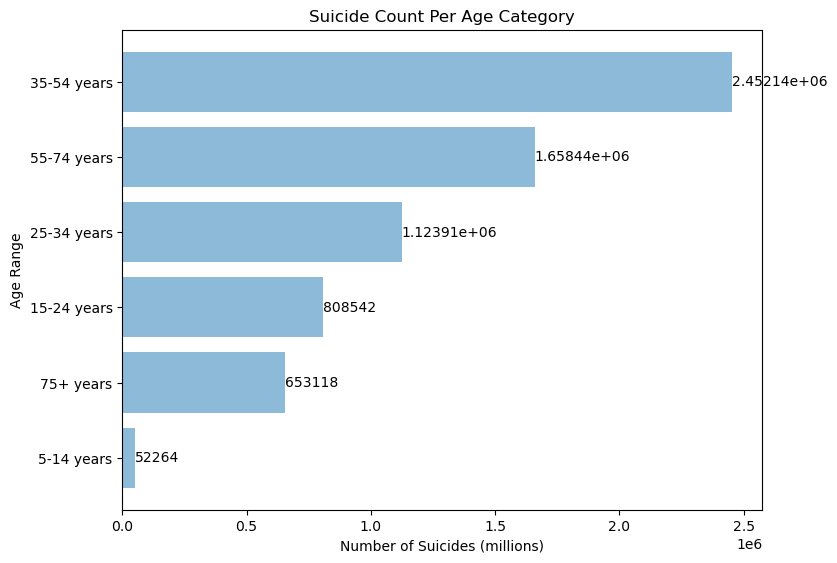

In [18]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
bars = axes.barh(age_range.index, age_range["suicides_no"], alpha=0.5, align="center")
axes.set_xlabel("Number of Suicides (millions)")
axes.set_ylabel("Age Range")
axes.set_title("Suicide Count Per Age Category")
axes.bar_label(bars)
axes.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))

### Percentage change in overall suicide rates per annum

In [19]:
annual_suicides = df[["year", "suicides_no"]].groupby(by=["year"], as_index=False).sum("suicides_no")

In [20]:
annual_suicides["prev_row"] = annual_suicides["suicides_no"].shift(1)

In [21]:
annual_suicides["%_change"] = ((annual_suicides["suicides_no"]-annual_suicides["prev_row"])/(annual_suicides["prev_row"]))*100

In [22]:
annual_suicides["%_change"] = annual_suicides["%_change"].round(2)

In [23]:
annual_suicides.drop(annual_suicides.tail(1).index, inplace=True)

### Percentage change in male and female suicide rates per annum

In [24]:
annual_change_per_gender = df[["year", "sex", "suicides_no"]].groupby(by=["year", "sex"], as_index=False).sum("suicides_no")

In [25]:
annual_change_per_gender["prev_year"] = annual_change_per_gender["suicides_no"].shift(2)

In [26]:
annual_change_per_gender.drop(annual_change_per_gender.tail(2).index, inplace=True)

In [27]:
annual_change_per_gender["%_change"] = (((annual_change_per_gender["suicides_no"])-(annual_change_per_gender["prev_year"]))/(annual_change_per_gender["prev_year"]))*100

In [28]:
annual_change_per_gender["%_change"] = annual_change_per_gender["%_change"].round(2)

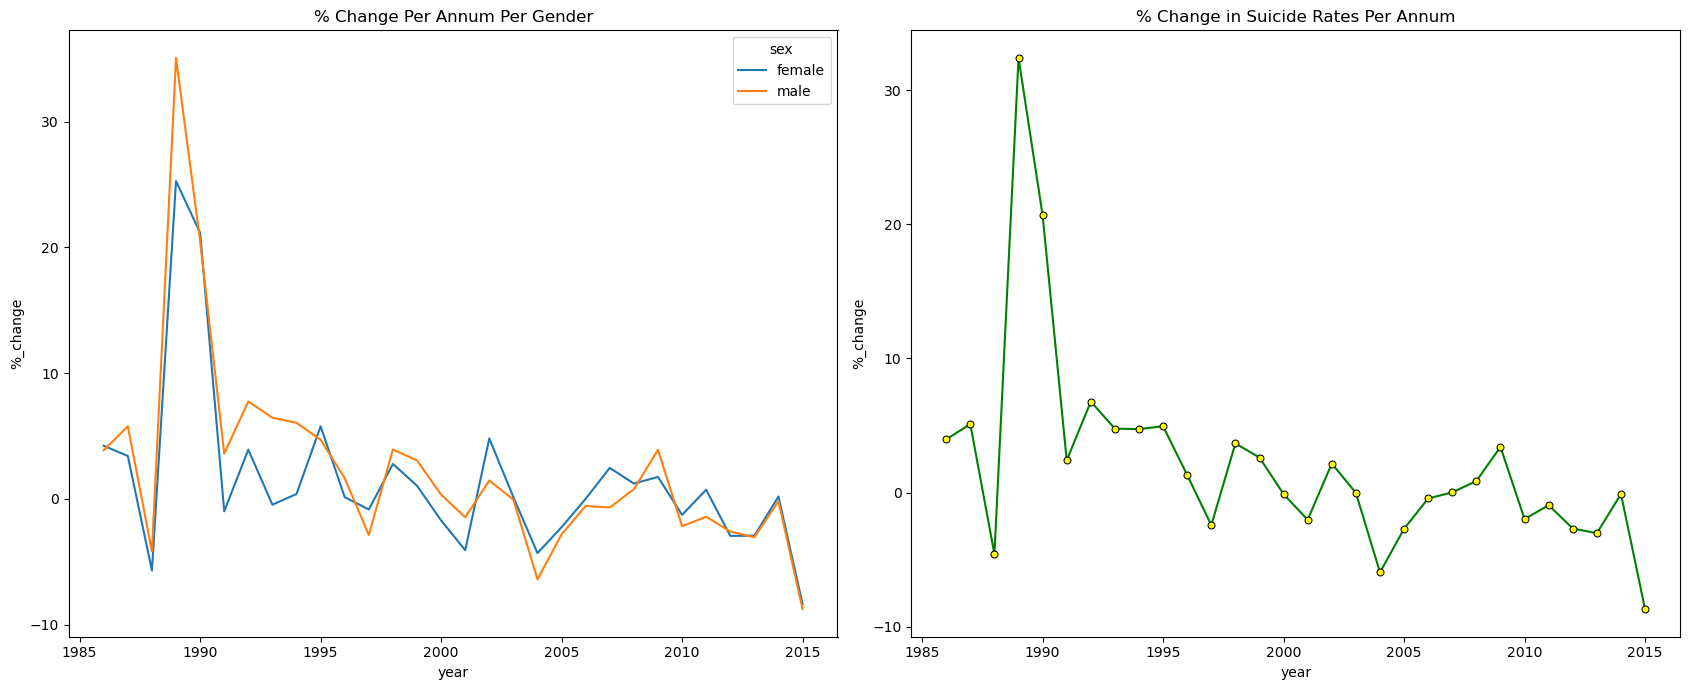

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(17,7), dpi=100)
sns.lineplot(ax=axes[0], data=annual_change_per_gender, x="year", y="%_change", hue="sex").set(title="% Change Per Annum Per Gender")
sns.lineplot(ax=axes[1], data=annual_suicides, x="year", y="%_change", marker="o", color="green", mfc="yellow", mec="black", ms=5).set(title="% Change in Suicide Rates Per Annum")
plt.tight_layout()

### Suicides Per Country

In [30]:
suicides_per_country = df[["country", "suicides_no"]].groupby(by=["country"], as_index=False).sum("suicides_no").sort_values(by=["suicides_no"], ascending=False).head(10)

In [31]:
suicides_per_country.reset_index(inplace=True)

[Text(0.5, 0, 'Total Suicides 1985-2016'),
 Text(0.5, 1.0, 'Countries With Highest Suicide Totals (1985-2016)')]

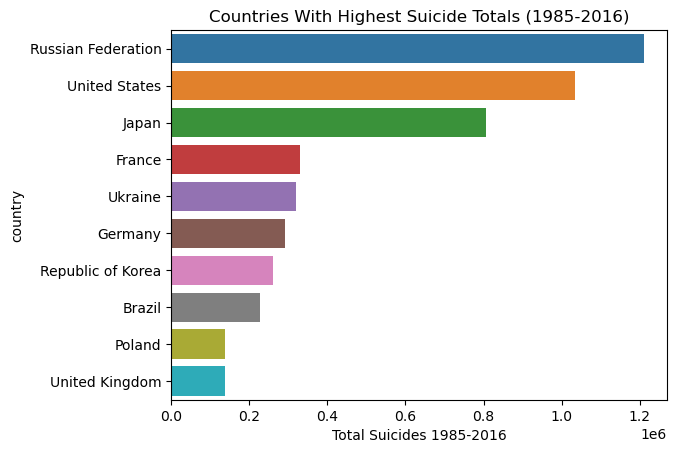

In [32]:
sns.barplot(suicides_per_country, x="suicides_no", y="country").set(xlabel="Total Suicides 1985-2016", title="Countries With Highest Suicide Totals (1985-2016)")

### Correlation Between GDP and Number of Suicides

In [33]:
gdp_and_suicide = df[["country", "gdp_for_year ($)", "suicides_no"]].groupby(by=["country"], as_index=False).agg(
    avg_gdp=("gdp_for_year ($)", np.mean),
    total_suicides=("suicides_no", np.sum)).sort_values(by=["total_suicides"], ascending=False).head(10)

gdp_and_suicide.reset_index(inplace=True)
gdp_and_suicide.drop(columns=["index"], inplace=True)

<Axes: xlabel='total_suicides', ylabel='country'>

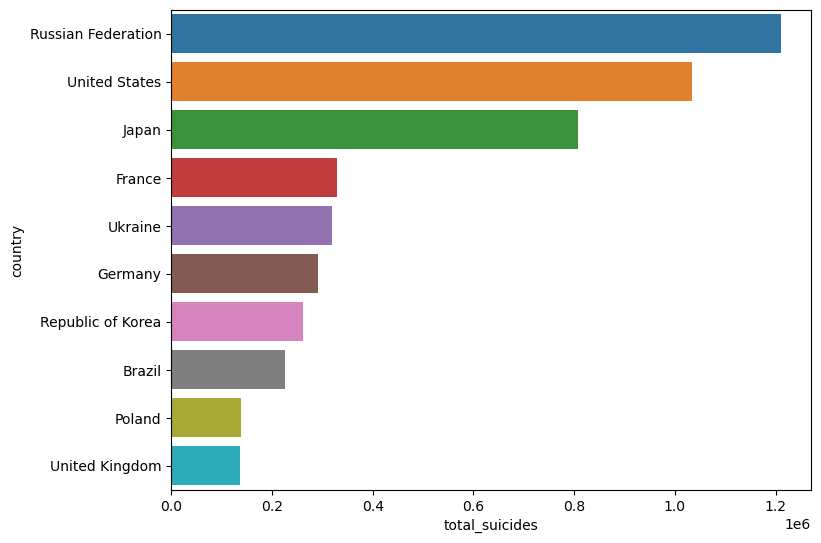

In [34]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
sns.barplot(data=gdp_and_suicide, x="total_suicides", y="country", ax=axes)

#### What percentage of the total GDP does their GDP compromise of 

In [35]:
# Sum of the top 10 countries GDP

top_10_gdp = sum(gdp_and_suicide["avg_gdp"])

In [36]:
# Sum of all the countries in the datasets GDP

all_gdp = sum(df[["country", "gdp_for_year ($)"]].groupby("country", as_index=False).mean("gdp_for_year ($)")["gdp_for_year ($)"])

([<matplotlib.patches.Wedge at 0x220fd43ef50>,
 [Text(0.38976010163536395, 1.2401963808902166, 'GDP of Top 10 Countries with Highest Suicide Totals'),
  Text(-0.32979710732770773, -1.049396906798508, 'Total GDP of All 101 Countries in Dataset')],
 [Text(0.239852370237147, 0.7631977728555177, '40.3%'),
  Text(-0.17988933126965873, -0.5723983127991862, '59.7%')])

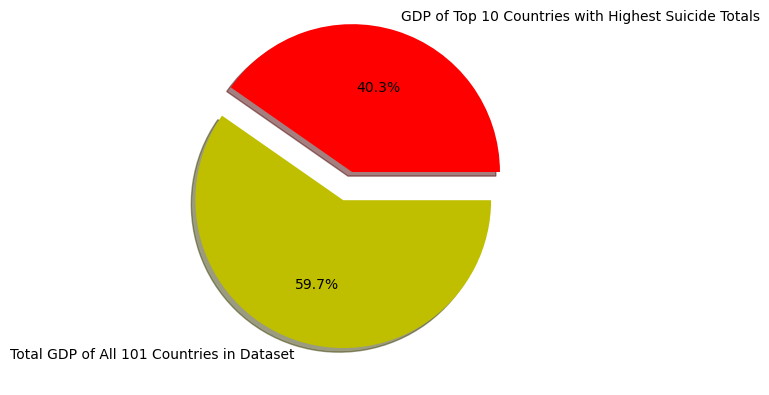

In [37]:
plt.pie(x=[top_10_gdp, all_gdp], colors=["r", "y"], explode = [0.2,0],autopct = '%1.1f%%', shadow=True, labels=["GDP of Top 10 Countries with Highest Suicide Totals", "Total GDP of All 101 Countries in Dataset"])

# Conclusions

### Which countries had the highest total suicide count?
The following includes the top 10 countries with the highest total suicide count (high to low):
1) Russian Federation
2) US
3) Japan
4) France
5) Ukraine 
6) Germany
7) Republic of Korea
8) Brazil
9) Poland
10) UK


### Do more males or females commit suicide?
It was found that from 1985-2016 total suicides for males was approximately **3.32 times greater** than total suicides for females.

### How are annual suicide rates changing over time?
Between 1985 to 2000 the suicide count was increasing, however from 2000 to 2015 the suicide count and rate is decreasing. 
    
     
### Which age range features the greatest number of suicides?
Of the listed age groups(found below) suicides were found to be **highest in the 35-45 age bracket**:

- 5-14
- 15-24
- 25-34
- 35-54
- 55-74
- 75+

### Can any correlation be found between gdp (whether year or per capita) and number of suicides?
The distribution of GDP data was largely skewed towards the lower end of the spectrum and there were some countries with extremely high GDP's. This created difficulties when plotting results. Instead to gauge the relationship between GDP and number of suicides, the GDP of the top 10 countries with the highest suicide counts was calculated as a percentage of the total GDP represented in the dataset. It was found that the top 10 countries which had the highest suicide count **accounted for 40%** of the GDP of the overall dataset. **This implies that GDP is positively correlated with number of suicides.**